The Apriori Algorithm gives us associative properties within transactions. This is also known as Association Rules for our dataset. The analysis of these association rules depend on three measures- Support, Confidence, and Lift.

##### Data Engineering

In [1]:
import pandas as pd
import numpy as np
import warnings
from datetime import datetime
# Warnings
warnings.filterwarnings('ignore')

# Import 
output = pd.read_pickle("data/data_file.pkl")
output = output[["CustomerID","InvoiceDate", "Quantity","TotalSales","ItemNumber","BILLINGCOUNTRY","State"]]
output['InvoiceDate']= pd.to_datetime(output['InvoiceDate'], format='%Y-%m-%d')
df = output[output['InvoiceDate'] >= '2019-01-01']
print('Unique Items: ', df['ItemNumber'].nunique())
print( '\n', df['ItemNumber'].unique())
# Year/Month/Days/Weekday
df['year'] =  df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['weekday'] = df['InvoiceDate'].dt.day_name()
df['weekday'] = pd.Categorical(df['weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)
df.head()

Unique Items:  2001

 ['2225-1G' '2700-8' '9000-25' ... 'GRT2A' '6823' '6818']


,CustomerID,InvoiceDate,Quantity,TotalSales,ItemNumber,BILLINGCOUNTRY,State,year,month,day,weekday
153,9273,2019-01-07,2.0,16.18,2225-1G,USA,MN,2019,1,7,Monday
154,7146,2019-01-07,2.0,167.42,2700-8,USA,WI,2019,1,7,Monday
155,85,2019-01-07,6.0,1223.94,9000-25,USA,IL,2019,1,7,Monday
156,1017,2019-01-07,58.0,1158.84,7300-35,USA,MN,2019,1,7,Monday
157,4518,2019-01-07,10.0,480.80,5824-65,USA,KS,2019,1,7,Monday


Text(0.5, 1.0, 'Top 10 Sold Items')

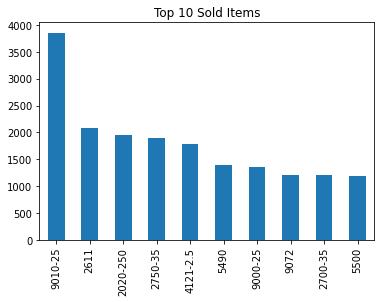

In [2]:
import matplotlib.pyplot as plt
# 10 most sold items
df['ItemNumber'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Sold Items')

- Transactions per month
- Transactions per weekday
- Transactions per hour

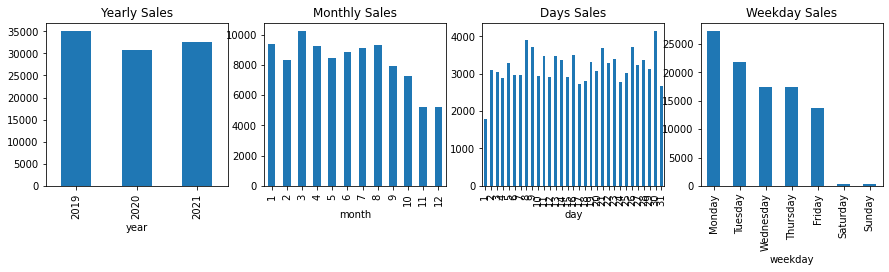

In [3]:
# Transactions (yearly/monthly/daily/weekday)
fig, axes = plt.subplots(1, 4, figsize=(15,3))
df.groupby('year')['Quantity'].count().plot(kind='bar', title='Yearly Sales',  ax=axes[0])
df.groupby('month')['Quantity'].count().plot(kind='bar', title='Monthly Sales', ax=axes[1])
df.groupby('day')['Quantity'].count().plot(kind='bar', title='Days Sales', ax=axes[2])
df.groupby('weekday')['Quantity'].count().plot(kind='bar', title='Weekday Sales', ax=axes[3])
plt.show()

In [75]:
# Number of sold items by Country
print( df.groupby(['BILLINGCOUNTRY','ItemNumber'])['ItemNumber'].count().head(5))

BILLINGCOUNTRY  ItemNumber 
Belgium         61224          1
                EU2751-1000    1
Canada          2020-250       4
                2049-1G        1
                2063-250       8
Name: ItemNumber, dtype: int64


### Market Basket Analysis

Association Rulles Mining
1) Support
2) Confidence


In [5]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Quantity'].unique():
    tlist = list(set(df[df['Quantity']==i]['ItemNumber']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

3441


[['2603-10',
  'LAX2019',
  'X2013',
  '2604-50',
  '7126-50',
  'EU2751-200L',
  '61507',
  '2603-60',
  '4122-2.5',
  'LAX4720',
  '61201',
  '2700-35',
  '49650-2.5G',
  '2612-50',
  'AU1151-440',
  'LAX2004',
  '17002',
  '9013-25',
  '4108-2',
  '49002-1L',
  'LAX4000',
  '4106-20A',
  '49551-2.5G',
  '5235-50',
  'CA49402-2.5G',
  '2701-50',
  '5644-5',
  '4107-32',
  'X9998',
  '49002-150',
  '2700-8',
  'LAX2000',
  '49011-1L',
  '6101-50',
  '4107-32A',
  '9104-25',
  '49240',
  '5645-5',
  'CA49002-2.5G',
  'LAX4025',
  '61703',
  '2705-5',
  '2601-10',
  '5189-50',
  '49501-2.5G',
  '9057-50',
  '2037-1',
  '9102-1G',
  '5015-50',
  '2202-32',
  '49560-150',
  '5657-5',
  '9007-50',
  'IL49002-2.5G',
  'GT2020-250',
  '49011-2.5G',
  '2202-8',
  '11047',
  '49002-2.5G',
  'LAX4023',
  '49660-200',
  '5646-30',
  'LAX4021',
  'X4700',
  '2600-10',
  'X3000',
  '5667-50',
  '6025-50',
  'LAX2024',
  '5240-50',
  '9010-25',
  '61807',
  '5502-50',
  '49550-2.5G',
  '49230',
  '

In [101]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)
df2.head()

,10037,10042,10048,10059,10064,10074,10088,10090,10100,10105,...,X9034,X9405,X9997,X9998,XX1061,XX1063,XX1113,XX1115,XX1192,XX2751
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(2703),(2611),0.010753,0.036908,0.010753,1.000000,27.094488,0.010356,inf
30,(5502),(2611),0.011043,0.036908,0.010753,0.973684,26.381475,0.010345,36.597501
84,"(49302, 9072)",(2611),0.010462,0.036908,0.010171,0.972222,26.341864,0.009785,34.671316
10,(2701),(2611),0.010753,0.036908,0.010171,0.945946,25.629921,0.009775,17.817204
102,"(5500, 9072)",(2611),0.011625,0.036908,0.010462,0.900000,24.385039,0.010033,9.630921
...,...,...,...,...,...,...,...,...,...
24,(5244),(2611),0.057541,0.036908,0.012206,0.212121,5.747316,0.010082,1.222386
72,(5490),(5244),0.063063,0.057541,0.013368,0.211982,3.683983,0.009739,1.195985
75,(5244),(5500),0.057541,0.040105,0.010753,0.186869,4.659530,0.008445,1.180492
99,(5490),"(5500, 2611)",0.063063,0.015984,0.011625,0.184332,11.532468,0.010617,1.206393


In [6]:
import pandas as pd
import numpy as np
output = pd.read_pickle("data/data_file.pkl")
output['InvoiceDate']= pd.to_datetime(output['InvoiceDate'])
df = output[output['InvoiceDate'] >= '2019-01-01']
print('Unique Items: ', df['ItemNumber'].nunique())
print( '\n', df['ItemNumber'].unique())

# Group dataframe rows into list/set
df = df.groupby(['CustomerID','InvoiceDate'], as_index=False).agg({'Name': 'count',  # Item #    
                                                'Quantity': lambda x: x.sum(),          # Total Quantity
                                                'TotalSales': lambda x: x.sum(),
                                                'ItemNumber': lambda x: set(np.unique(x))}) 
df.rename(columns={'ItemNumber': 'Items'}, inplace=True)
# Check missing values
print(df.isnull().sum().sort_values(ascending=False))
print(df.head())
df.to_pickle("data/basket.pkl")

Unique Items:  2001

 ['2225-1G' '2700-8' '9000-25' ... 'GRT2A' '6823' '6818']
CustomerID     0
InvoiceDate    0
Name           0
Quantity       0
TotalSales     0
Items          0
dtype: int64
   CustomerID InvoiceDate  Name  Quantity  TotalSales      Items
0           2  2019-01-10     1      40.0     32550.4  {6702-55}
1           2  2019-01-21     1      40.0     32550.4  {6702-55}
2           2  2019-02-11     1      40.0     32550.4  {6702-55}
3           2  2019-02-12     1      40.0     32550.4  {6702-55}
4           2  2019-02-27     1      40.0      3062.0  {6016-50}


In [8]:
df.describe()

,CustomerID,Name,Quantity,TotalSales
count,42936.000000,42936.000000,42936.000000,42936.000000
mean,5502.037405,2.294392,4315.427099,5690.533142
std,4416.017580,3.666361,12579.624453,18044.754126
min,2.000000,1.000000,-82011.000000,-193115.040000
25%,1223.000000,1.000000,3.000000,106.137500
50%,4955.500000,1.000000,42.000000,693.120000
75%,9504.000000,2.000000,2842.750000,4388.212500
max,14703.000000,400.000000,386181.818000,764608.540000


In [14]:
df.sort_values(['Name'],ascending=False)

,CustomerID,InvoiceDate,Name,Quantity,TotalSales,ItemNumber
40704,12940,2021-08-30,400,4800.00,33456.00,"{4122-2.5, 4129-5, 4121-2.5, 4126-5}"
40703,12940,2021-08-27,198,5940.00,3742.20,"{4125, 4124}"
24924,6133,2021-05-26,70,70.00,0.00,"{4128-5, 4110-5, 4106-2.5, 4107-32, 4120-5, 41..."
2791,91,2020-10-30,65,49072.89,764608.54,"{TW1061-55, SV1002-12, EC1063-55, UY1083, UY10..."
24850,6133,2020-07-09,56,224.00,0.00,"{2604-10, 2614-20, 2603-60, 2603-10, 2502-60, ..."
...,...,...,...,...,...,...
19157,4130,2021-01-25,1,300.00,556.38,{2703}
19156,4130,2020-12-03,1,500.00,927.30,{2703}
19155,4130,2020-10-29,1,300.00,556.38,{2703}
19154,4130,2020-09-28,1,300.00,556.38,{2703}
